In [9]:
import random, requests, hashlib, base64, time
import json
import re
#from HTMLParser import HTMLParser
from bs4 import BeautifulSoup, NavigableString, Tag
from bs4 import BeautifulSoup as BS
from bs4 import Comment
import csv
import sys
import unicodedata
import datetime
#import arrow
import urllib
import pandas as pd
import numpy as np
import urllib
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import matplotlib as mpl


In [2]:
reader = pd.read_csv("datasets/companies_sorted.csv",low_memory=True, chunksize=10**4)
df = pd.concat([x for x in reader], ignore_index=True)
print('complete')

complete


In [3]:
df.sort_values(by='current employee estimate', ascending=False).head()

Unnamed: 0                       name         domain  year founded  \
0     5872184                        ibm        ibm.com        1911.0   
1     4425416  tata consultancy services        tcs.com        1968.0   
2       21074                  accenture  accenture.com        1989.0   
3     2309813                    us army     goarmy.com        1800.0   
4     1558607                         ey         ey.com        1989.0   

                              industry size range  \
0  information technology and services     10001+   
1  information technology and services     10001+   
2  information technology and services     10001+   
3                             military     10001+   
4                           accounting     10001+   

                                 locality         country  \
0       new york, new york, united states   united states   
1              bombay, maharashtra, india           india   
2                 dublin, dublin, ireland         ireland   
3     alexandria, virginia, united states   united states   
4  london, greater london, united kingdom  united kingdom   

                                     linkedin url  current employee estimate  \
0                        linkedin.com/company/ibm                     274047   
1  linkedin.com/company/tata-consultancy-services                     190771   
2                  linkedin.com/company/accenture                     190689   
3                    linkedin.com/company/us-army                     162163   
4              linkedin.com/company/ernstandyoung                     158363   

   total employee estimate  
0                   716906  
1                   341369  
2                   455768  
3                   445958  
4                   428960

In [30]:
#value counts
print(df['size range'].value_counts())
print()
print(df['country'].value_counts())
print()
print(df['industry'].value_counts())
print()
print(df['year founded'].value_counts(bins=10))
print()
print(df['current employee estimate'].value_counts(bins=10))

1 - 10          5585399
11 - 50         1126610
51 - 200         324853
201 - 500         78494
501 - 1000        28394
1001 - 5000       24537
5001 - 10000       3044
10001+             2095
Name: size range, dtype: int64

united states                2278866
united kingdom                511969
canada                        186621
india                         144444
spain                         143941
                              ...   
niue                               1
saint pierre and miquelon          1
norfolk island                     1
saint barthélemy                   1
u.s. virgin islands                1
Name: country, Length: 236, dtype: int64

information technology and services    453044
marketing and advertising              338162
construction                           257921
management consulting                  194556
real estate                            193486
                                        ...  
fishery                                  2355
ranch

In [3]:
df['is_ss'] = np.nan
#df.at[4831970, 'is_ss'] = 1
df[df['name'].str.contains('fotio', na=False, regex=False)]

Unnamed: 0                                         name  \
1386515     4131309                        fotiou frames limited   
4831970      689172                                        fotio   
4899621       39906  f.g.fotiou developments & constructions ltd   

               domain  year founded        industry size range  \
1386515    fotiou.com           NaN  consumer goods     1 - 10   
4831970      fotio.co        2012.0     photography     1 - 10   
4899621  fgfotiou.com        1980.0    construction     1 - 10   

                                locality country  \
1386515         vaughan, ontario, canada  canada   
4831970                              NaN     NaN   
4899621  mesa geitonia, limassol, cyprus  cyprus   

                                              linkedin url  \
1386515         linkedin.com/company/fotiou-frames-limited   
4831970                         linkedin.com/company/fotio   
4899621  linkedin.com/company/f-g-fotiou-developments-&...   

         current employee estimate  total employee estimate  is_ss  
1386515                          5                        7    NaN  
4831970                          1                        1    NaN  
4899621                          1                        3    NaN

In [4]:
for row in df[df.index <= 5].itertuples():
    print(row.Index, row.domain)

0 ibm.com
1 tcs.com
2 accenture.com
3 goarmy.com
4 ey.com
5 hpe.com


In [ ]:
#print(df[df.index < 10
dfa = df
dfa = df[df['name'] == 'fotio']
df = df.sort_values(by='current employee estimate', ascending=True).reset_index(drop=True)
#print(df)
adjustment = 1000 + 5000
counter = adjustment
for row in df[(df.index >= counter) & (df.index < counter + 1000000) ].itertuples():
    if row.domain == 'nan':
        continue
    else:
        try:
            url2 ='https://' + str(row.domain)
            url = urllib.request.urlopen(url2)
            s = url.read()
            soup = BeautifulSoup(s, 'html.parser')
            comments = soup.find_all(string=lambda text: isinstance(text, Comment))
            #print('start')
            for c in comments:
                if "Squarespace" in c:
                    print(str(i.name) + ": YESS")
                    df.at[row.Index, 'is_ss'] = 1
                    break
            #print(url2)                
            #print('finish')    


        except:
            try:
                url2 ='http://' + str(row.domain)
                #print(url2)
                url = urllib.request.urlopen(url2)
                s = url.read()
                soup = BeautifulSoup(s, 'html.parser')
                comments = soup.find_all(string=lambda text: isinstance(text, Comment))
                for c in comments:
                    if "Squarespace" in c:
                        print(str(i.name) + ": YESS")
                        df.at[row.Index, 'is_ss'] = 1
                        break
            except:
                pass
        
    counter += 1
    if counter == 1 + adjustment:
        print(counter)
    elif counter == 10 + adjustment:
        print(counter)
    elif counter == 100 + adjustment:
        print(counter)
    elif counter == 500 + adjustment:
        print(counter)
    elif counter == 1000 + adjustment:
        print(counter)
    elif counter % 10000 == 0:
        print(counter)
    elif counter % 100000 == 0:
        print(counter)
        
     

6001
6010
6100


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


6500
7000


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
C:\Users\cccnyc1dbl\AppData\Local\Continuum\anaconda32\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [ ]:
df[(df['is_ss'] == 1) | (df['name'] == 'fotio')]

In [ ]:
url2= 'https://www.fotio.co/'
with urllib.request.urlopen(url2) as url:
    s = url.read()
    #data = json.loads(url.read())
    #pr = requests.get(url2)
    #data = json.loads(s)
    #print(s)
    soup = BeautifulSoup(s, 'html.parser')
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))
    for c in comments:
        print(c)
        print("===========")
        c.extract()
        if "Squarespace" in c:
            #element = soup.find("script", data-name="static-context")
            #print(element.attrs["Static.SQUARESPACE_CONTEXT"])
            break
        

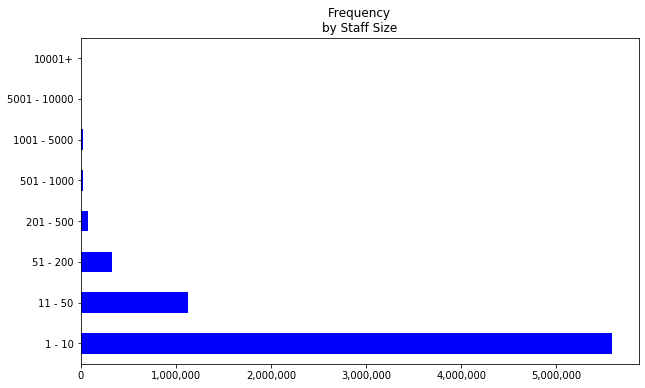

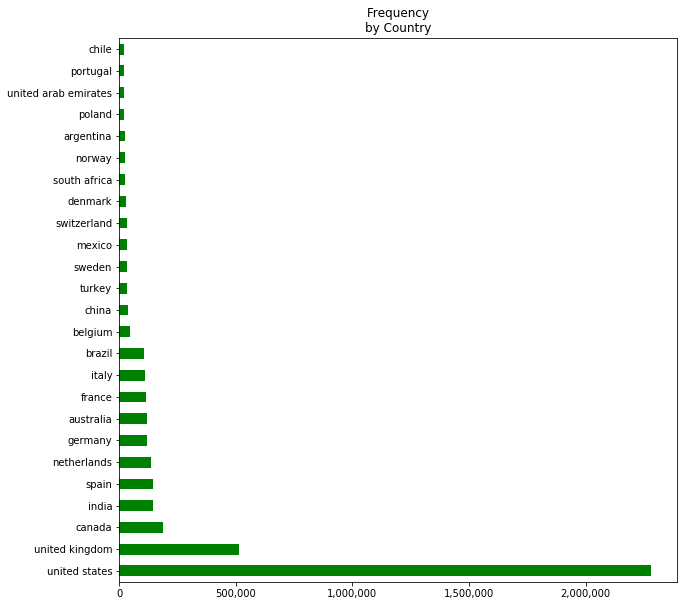

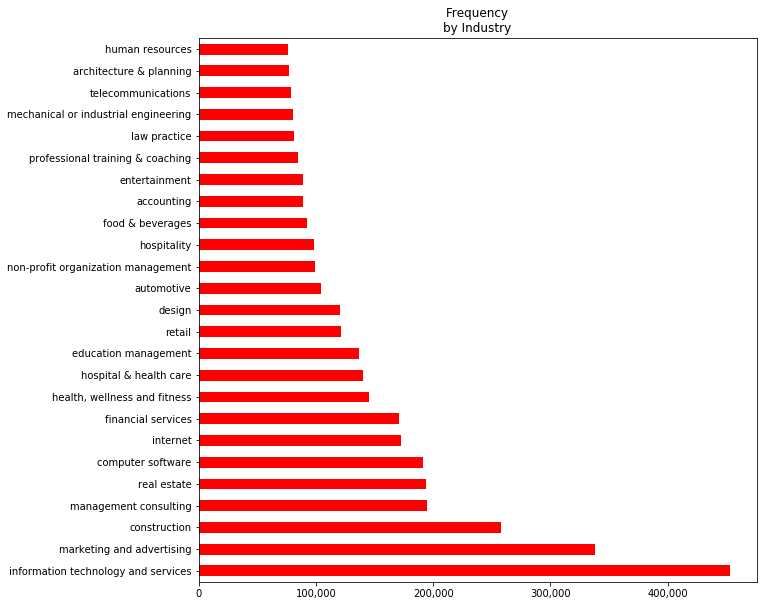

In [36]:
def barchart(data, type, title, limit, figsize, color):
    fig, ax = plt.subplots()
    if type == 'vertical':
        ax = data.value_counts().head(limit).plot(ax=ax, kind='bar', title = title, figsize = figsize, color=color)
        ax = ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    elif type == "horizontal":
        ax = data.value_counts().head(limit).plot(ax=ax, kind='barh', title = title, figsize = figsize, color=color)
        ax = ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    return ax

barchart(df['size range'], 'horizontal', "Frequency\nby Staff Size", 20, [10,6], 'blue')
barchart(df['country'], 'horizontal', "Frequency\nby Country", 25, [10,10], 'green')
barchart(df['industry'], 'horizontal', "Frequency\nby Industry", 25, [10,10], 'red')


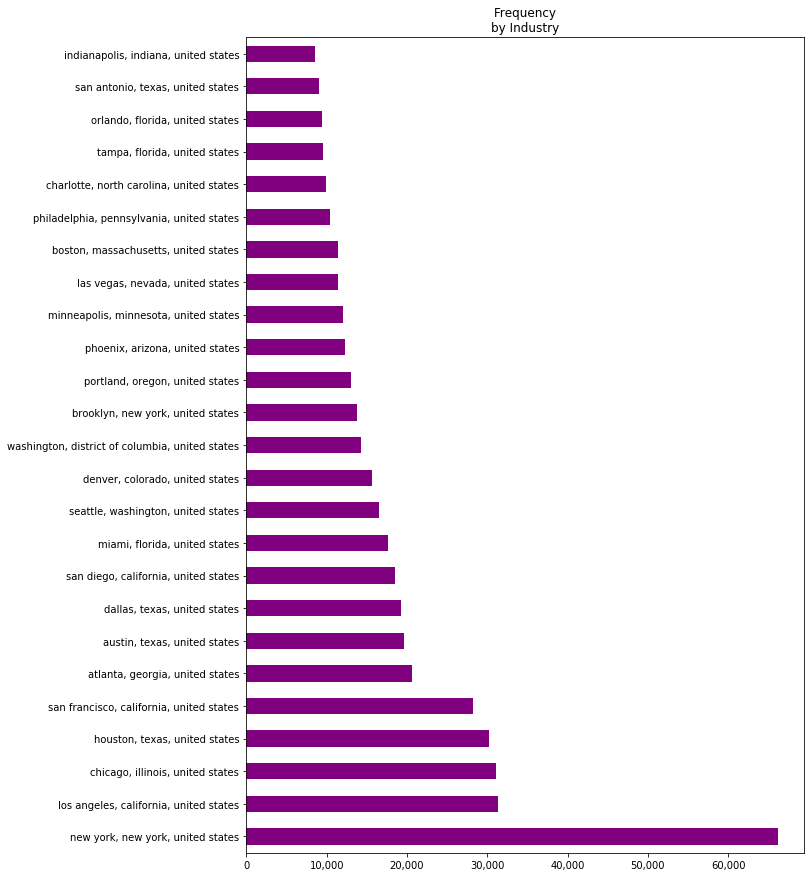

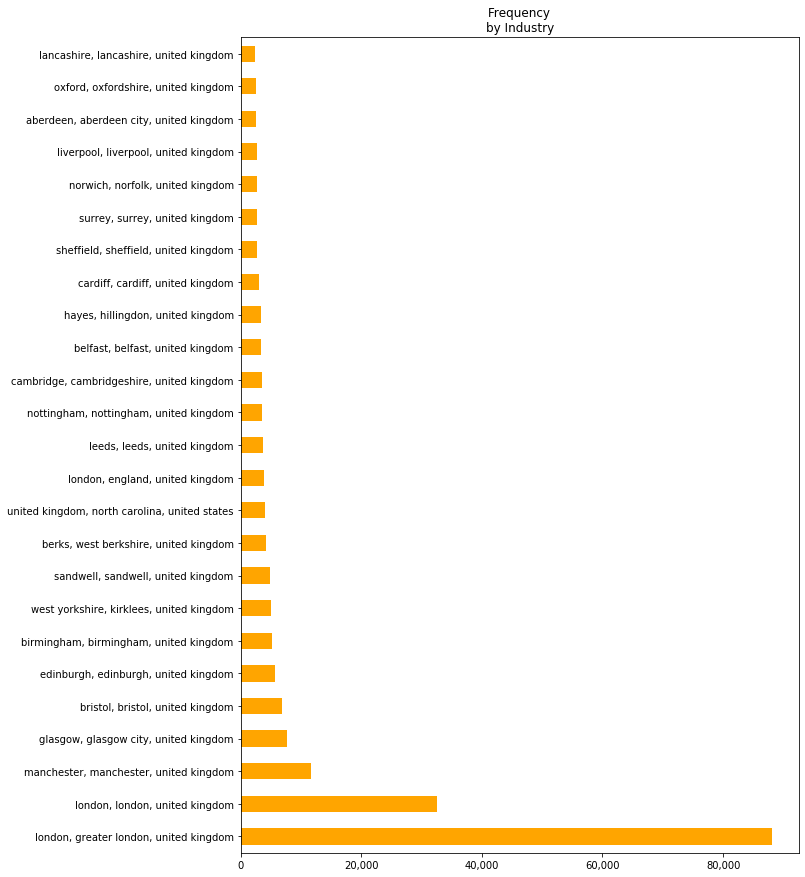

In [37]:
barchart(df[df['country'] == 'united states']['locality'], 'horizontal', "Frequency\nby Industry", 25, [10,15], 'purple')
barchart(df[df['country'] == 'united kingdom']['locality'], 'horizontal', "Frequency\nby Industry", 25, [10,15], 'orange')